# Лабораторна №1. Потьомкін Лев, К-27

## 1. Метод ділення навпіл

### Теорія

Нехай 
1. $f \in C[a, b]$
2. $f(a) f(b) < 0$
3. $\exists ! \, x^* \in [a, b]: f(x^*) = 0$

Тоді нехай $a_0 = a, b_0 = b, x_0 = (a + b)/2$. Ітераційний процес:

1. $f(x_i) = 0 \Rightarrow x^* = x_i$
2. $a_{i+1} = x_i \text{ if sgn} f(x_i) = \text{sgn} f(a_i), \text{otherwise } a_i $
3. $b_{i+1} = x_i \text{ if sgn} f(x_i) = \text{sgn} f(b_i), \text{otherwise } b_i $
4. $x_{i+1} = (a_{i+1} + b_{i+1})/2$

Оцінка точності: $ | x^* - x_n | \leq \dfrac{b - a}{2^{n+1}} $

Звідси оцінка кількості ітерацій: $ n \geq \lceil \log_2{\frac{b-a}{\varepsilon}} \rceil + 1 $


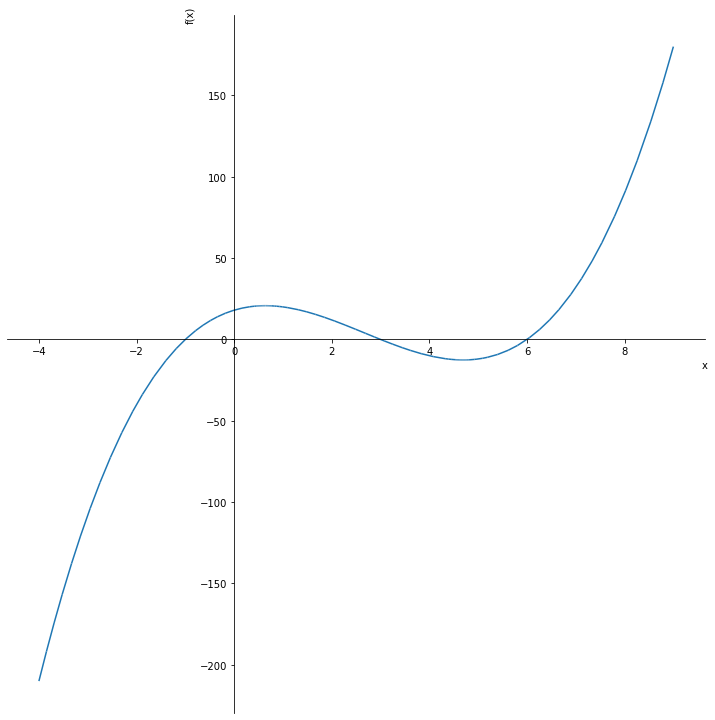

In [1]:
import sympy as sp
import math

x = sp.Symbol('x')
EPS = 1e-3

f = x**3 - 8*x**2 + 9*x + 18
sp.plot(f, (x, -4, 9), size=(10, 10))

In [2]:
# відрізок
a, b = -50.0, 0.0

# неперервність випливає з того, що f - многочлен
# f на кінцях відрізку набуває різних знаків
assert(f.subs(x, a) * f.subs(x, b) < 0)
# єдиність кореня виплиаває з монотонності f на відрізку

# апрiорна к-ть операцiй
N = math.ceil(math.log2((b-a) / EPS)) + 1
print('N =', N)

for i in range(N):
    x_i = (a + b) / 2
    y = f.subs(x, x_i)
    print(f'{i+1:2}) x_i = {x_i:8.4f}, f(x_i) = {y:8.4f}')
    if y > 0:
        b = x_i
    elif y < 0:
        a = x_i
    else:
        break

print(f'x = {x_i:.4f}')

N = 17
 1) x_i = -25.0000, f(x_i) = -20832.0000
 2) x_i = -12.5000, f(x_i) = -3297.6250
 3) x_i =  -6.2500, f(x_i) = -594.8906
 4) x_i =  -3.1250, f(x_i) = -118.7676
 5) x_i =  -1.5625, f(x_i) = -19.4084
 6) x_i =  -0.7812, f(x_i) =   5.6091
 7) x_i =  -1.1719, f(x_i) =  -5.1425
 8) x_i =  -0.9766, f(x_i) =   0.6502
 9) x_i =  -1.0742, f(x_i) =  -2.1391
10) x_i =  -1.0254, f(x_i) =  -0.7180
11) x_i =  -1.0010, f(x_i) =  -0.0274
12) x_i =  -0.9888, f(x_i) =   0.3131
13) x_i =  -0.9949, f(x_i) =   0.1433
14) x_i =  -0.9979, f(x_i) =   0.0581
15) x_i =  -0.9995, f(x_i) =   0.0154
16) x_i =  -1.0002, f(x_i) =  -0.0060
17) x_i =  -0.9998, f(x_i) =   0.0047
x = -0.9998


---

## 2. Метод Ньютона

### Теорія

Нехай 

1. $ f \in C^2[a, b] $
2. $ f(a)f(b) < 0 $
3. $ \forall x \in [a, b]: f''(x) $ не змінює знак
4. $ x_0 \in [a, b], f(x_0)f''(x_0) > 0 $

Ітераційний процес:

$ x_{i+1} = x_i - \dfrac{f(x_i)}{f'(x_i)} $

Оцінка точності: $ |x_n - x^*| \leq q^{2^n - 1} | x_0 - x^* | $

Оцінка кількості ітерацій: $ n \geq \log_2 \bigg ( \dfrac{\log (|x_0 - x^*|/\varepsilon ) }{\log 1/q} + 1 \bigg ) + 1 $

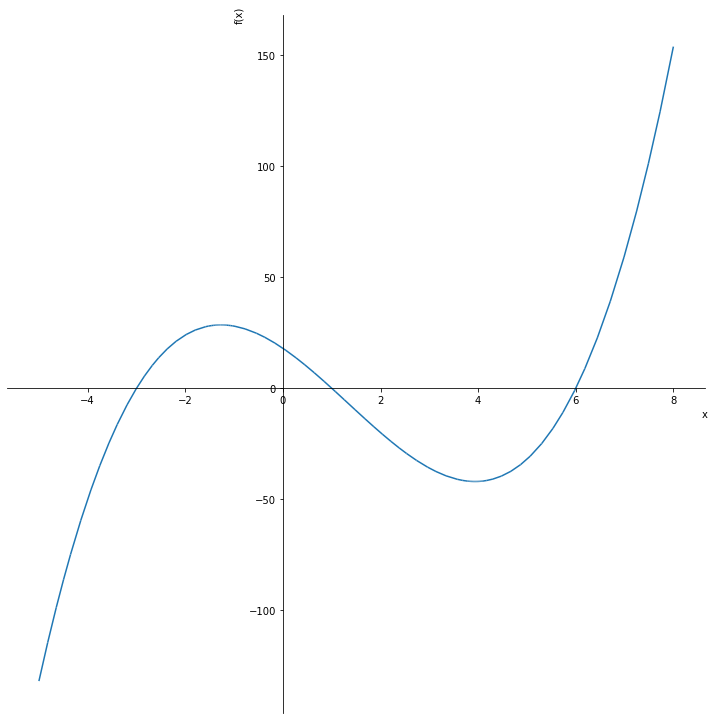

In [3]:
f = x**3 - 4*x**2 - 15*x + 18
sp.plot(f, (x, -5, 8), size=(10, 10))

In [4]:
f_prime = 3*x**2 - 8*x - 15
assert(f_prime == sp.diff(f, x))

interval = sp.Interval(-10, 0)
x_i = -5.0

# неперервна диференційовність випливає з того, що f - многочлен
# на [-10, 0] f опукла вгору, тобто f'' < 0
# на кінцях відрізку набуває різних знаків
assert(f.subs(x, interval.left) * f.subs(x, interval.right) < 0)
# остання умова
assert(f.subs(x, x_i) * sp.diff(f, x, 2).subs(x, x_i) > 0)

# апрiорна к-ть операцiй
q = 0.8
N = math.ceil(math.log2(math.log(interval.measure / EPS) / math.log(1 / q)) + 1) + 1
print('N =', N)

for i in range(N):
    x_i -= (f / f_prime).subs(x, x_i)
    print(f'{i+1:2}) x_i = {x_i:8.4f}')

print(f'x = {x_i:.4f}')

N = 8
 1) x_i =  -3.6800
 2) x_i =  -3.1206
 3) x_i =  -3.0049
 4) x_i =  -3.0000
 5) x_i =  -3.0000
 6) x_i =  -3.0000
 7) x_i =  -3.0000
 8) x_i =  -3.0000
x = -3.0000


---

## 3. Метод січних

### Теорія

Ітераційний процес:

$ x_{i+1} = x_i - \dfrac{(x_i - x_{i-1})f(x_i)}{f(x_i) - f(x_{i-1})} $

Порядок збіжності: $ \dfrac{1 + \sqrt{5}}{2} $


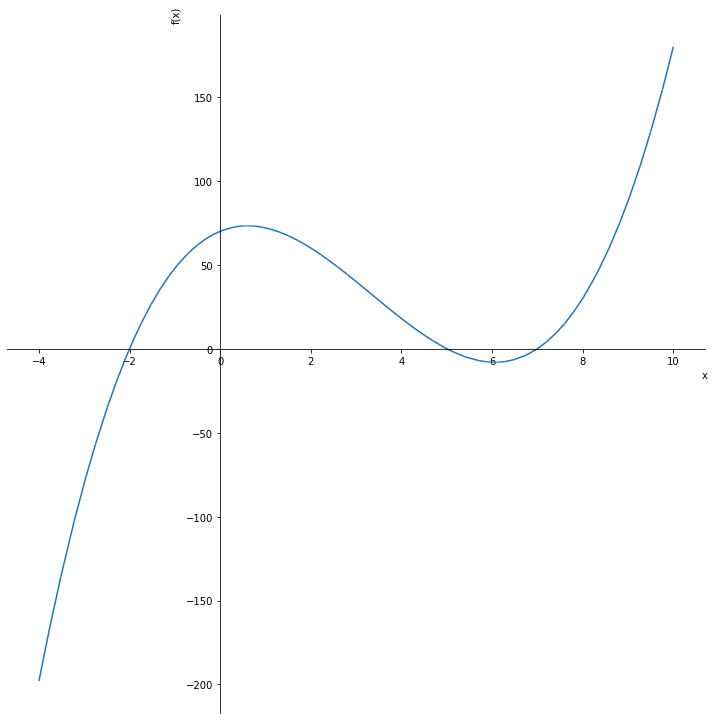

In [5]:
f = x**3 - 10*x**2 + 11*x + 70
sp.plot(f, (x, -4, 10), size=(10, 10))

In [6]:
x_prev, x_i = -10.0, -5.0
N = 8

for i in range(N):
    x_new = x_i - (x_i - x_prev) * f.subs(x, x_i) / (f.subs(x, x_i) - f.subs(x, x_prev))
    x_prev, x_i = x_i, x_new
    print(f'{i+1:2}) x_i = {x_i:8.4f}')

print(f'x = {x_i:.4f}')

 1) x_i =  -3.9286
 2) x_i =  -2.7551
 3) x_i =  -2.2436
 4) x_i =  -2.0392
 5) x_i =  -2.0023
 6) x_i =  -2.0000
 7) x_i =  -2.0000
 8) x_i =  -2.0000
x = -2.0000
